In [24]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("Dataset_Anand.csv")
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [26]:
data.shape

(103, 14)

In [27]:
data.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [35]:
data['Accel']=data.Accel.str.extract(r"(\d+\.\d+)")
data['TopSpeed']=data.TopSpeed.str.extract('(^\d*)')
data['Range']=data.Range.str.extract('(^\d*)')
data['Efficiency']=data.Efficiency.str.extract('(^\d*)')
data['FastCharge']=data.FastCharge.str.extract('(^\d*)')
convert_dict = {'Accel': float, 'TopSpeed': int, 'Range': int, 'Efficiency' : int, 'FastCharge' : int}
data['Accel'] = pd.to_numeric(data['Accel'])
data['TopSpeed'] = pd.to_numeric(data['TopSpeed'])
data['Range'] = pd.to_numeric(data['Range'])
data['Efficiency'] = pd.to_numeric(data['Efficiency'])
data['FastCharge'] = pd.to_numeric(data['FastCharge'])
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [36]:
data["Brand"].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

In [37]:
data["Model"].value_counts()

e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh                    1
e-tron 50 quattro                1
e-2008 SUV                       1
i3 120 Ah                        1
M-Byte 95 kWh 2WD                1
Name: Model, Length: 102, dtype: int64

In [38]:
data["RapidCharge"].value_counts()

Rapid charging possible        98
Rapid charging not possible     5
Name: RapidCharge, dtype: int64

In [39]:
data["PowerTrain"].value_counts()

All Wheel Drive      41
Front Wheel Drive    37
Rear Wheel Drive     25
Name: PowerTrain, dtype: int64

In [40]:
data["PlugType"].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [41]:
data["BodyStyle"].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [42]:
data["Segment"].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

In [43]:
data["RapidCharge"] = data.RapidCharge.map({"Rapid charging not possible" : 0, "Rapid charging possible" : 1})
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940.0,1,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620.0,1,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560.0,1,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190.0,1,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [44]:
data1 = pd.get_dummies(data, columns = ['Brand', 'Model', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'])
data1.head()

,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,Seats,PriceEuro,Brand_Aiways,Brand_Audi,...,BodyStyle_Sedan,BodyStyle_Station,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E,Segment_F,Segment_N,Segment_S
0,4.6,233,450,161,940.0,1,5,55480,0,0,...,1,0,0,0,0,1,0,0,0,0
1,10.0,160,270,167,250.0,1,5,30000,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,210,400,181,620.0,1,5,56440,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6.8,180,360,206,560.0,1,5,68040,0,0,...,0,0,0,0,0,1,0,0,0,0
4,9.5,145,170,168,190.0,1,4,32997,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)
data2 = pd.DataFrame(data2)
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0.123153,0.383275,0.405714,0.337278,1.000000,1.0,0.6,0.181407,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.389163,0.128920,0.200000,0.372781,0.103896,1.0,0.6,0.050654,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.128079,0.303136,0.348571,0.455621,0.584416,1.0,0.6,0.186334,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.231527,0.198606,0.302857,0.603550,0.506494,1.0,0.6,0.245860,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.364532,0.076655,0.085714,0.378698,0.025974,1.0,0.4,0.066033,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data2.isnull().sum()

0      0
1      0
2      0
3      0
4      5
      ..
162    0
163    0
164    0
165    0
166    0
Length: 167, dtype: int64

In [50]:
data2.dropna(axis=0, inplace=True)

In [51]:
data2.shape

(98, 167)

In [64]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 3
pca_data = pca.fit_transform(data2)
data3 = pd.DataFrame(pca_data)

In [65]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.1710088  0.09444825 0.08207902]
Total Variance Explained: 34.75


In [66]:
data3.head()

,0,1,2
0,1.173811,-0.610163,-0.431689
1,-0.846557,-1.023513,1.003857
2,0.811421,-0.306100,-0.231238
3,0.278266,0.261320,0.726249
4,-0.889236,-0.506610,-0.059879


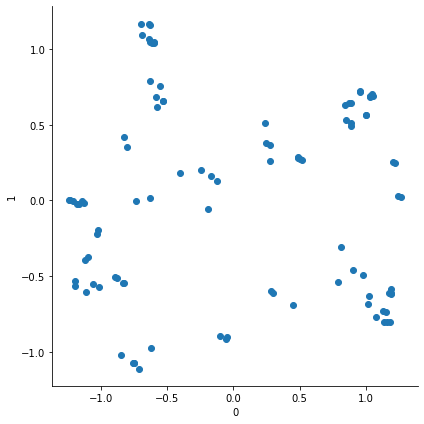

In [67]:
sns.FacetGrid(data3, height=6).map(plt.scatter, 0, 1)
plt.show()

In [68]:
import plotly.express as px
fig = px.scatter_3d(data_frame=None, x=data3.iloc[:,0], y=data3.iloc[:,1], z=data3.iloc[:,2])
fig.show()

In [69]:
pca = decomposition.PCA()
pca.n_components = 40
pca_data1 = pca.fit_transform(data2)
data3 = pd.DataFrame(pca_data1)
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.1710088  0.09444825 0.08207902 0.06440905 0.04718362 0.03843827
 0.03507753 0.02886815 0.02529758 0.02131229 0.01921072 0.01651203
 0.01630495 0.0144644  0.01286943 0.01215127 0.01093792 0.01048509
 0.00985949 0.00974304 0.00948989 0.00887671 0.00819069 0.00793873
 0.00742997 0.00687603 0.00652414 0.00589789 0.00567487 0.00547893
 0.0053047  0.00503775 0.00472381 0.00464936 0.0046318  0.00461741
 0.00450586 0.00435527 0.00419128 0.00405768]
Total Variance Explained: 85.91


In [70]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=20, n_iter=5000)
tsne_data = model.fit_transform(data2)

In [71]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim_1", "dim_2", "dim_3"))
tsne_df.head()

,dim_1,dim_2,dim_3
0,105.232620,114.311317,-6.917799
1,-78.860847,-58.498310,-114.717705
2,188.173813,192.331268,-125.392494
3,155.121811,-37.434944,-182.455704
4,-56.440437,-73.984123,25.549795


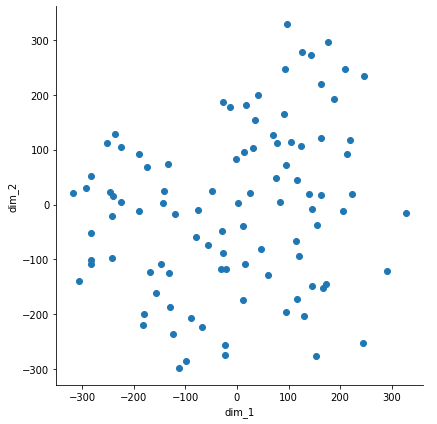

In [72]:
sns.FacetGrid(tsne_df, height=6).map(plt.scatter, "dim_1", "dim_2").add_legend()
plt.show()

In [73]:
fig = px.scatter_3d(data_frame=tsne_df, x="dim_1", y="dim_2", z="dim_3")
fig.show()

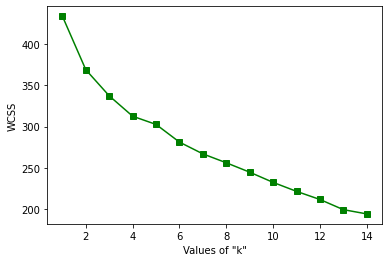

In [76]:
from sklearn.cluster import KMeans 
wcss = {}
for k in range(1,15):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    model.fit(data2)
    wcss[k] = model.inertia_
plt.plot((np.array(list(wcss.keys())).astype(float)), (np.array(list(wcss.values())).astype(float)), 'gs-')
plt.xlabel('Values of "k"')
plt.ylabel('WCSS')
plt.show()

In [1]:
model = KMeans(n_clusters=6).fit(data2)
label = model.labels_
u_labels = np.unique(model.labels_)
model.fit(data2) 
y_pred = model.predict(data2)
y_pred

NameError: ignored